# Loan Prediction

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


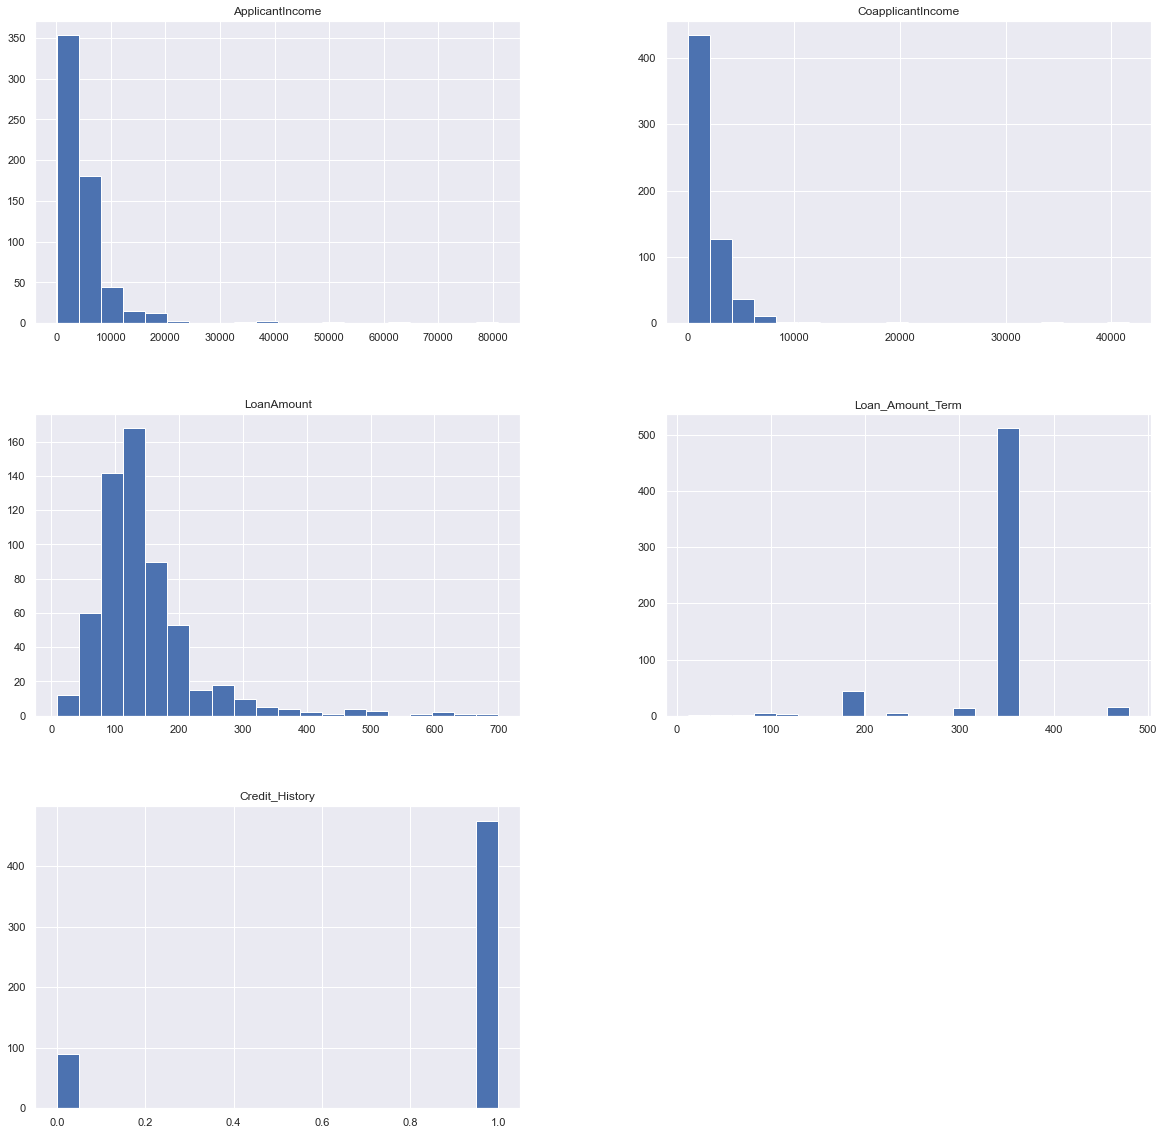

In [6]:
sns.set_theme()
df.hist(figsize = (20,20), bins = 20)
plt.show()

here graph showing we can see the col credit history has only two values which is 1 / 0 and col loan amount term is right skwed mostly ,Loan amount term can be anything depends on applicant loan amount and the plan he/she chosen.So removing these data will have a serious impact on our dataset and will affect our model for better prediction.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

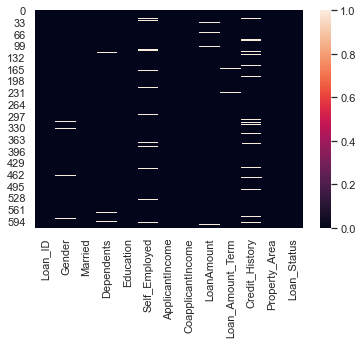

In [9]:
sns.heatmap(df.isnull())

there are some missing values are present

In [11]:
sum(df.duplicated())

0

In [12]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# EDA

In [13]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

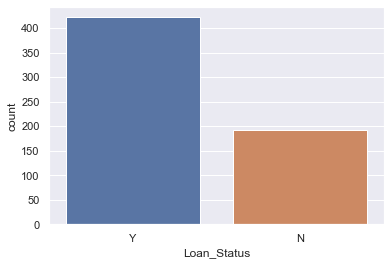

In [14]:
sns.countplot(df['Loan_Status'])

Data is imbalanced

In [15]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

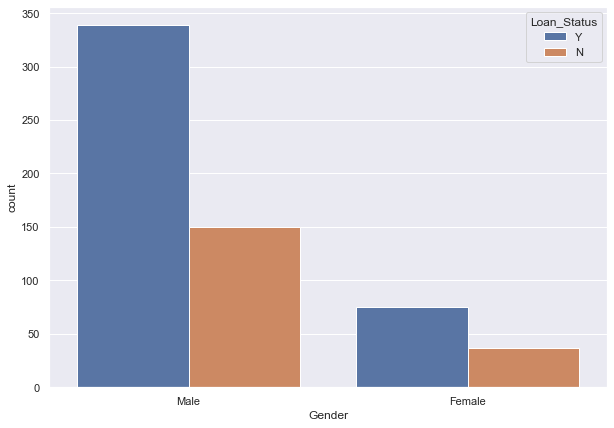

In [16]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Gender', hue='Loan_Status',data= df )


Male peoples have more laoan_status counts is more than female and loan is approving for most of the males than females.

In [17]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

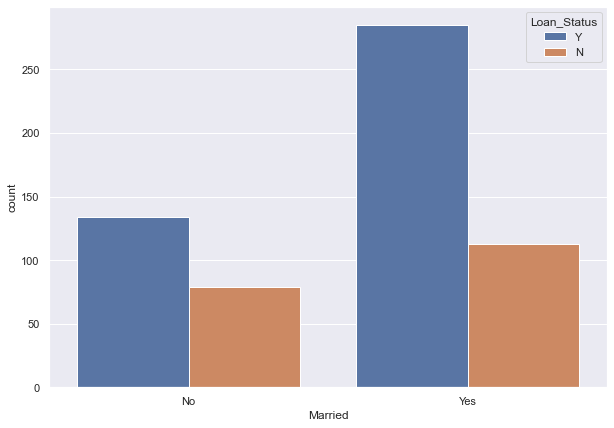

In [18]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Married', hue='Loan_Status',data= df )


Loan applicants who have applied for loan is married mostly and checking with target variable,we can see clearly that loan is sanctioning for most of the married people than un-married

<AxesSubplot:xlabel='Dependents', ylabel='count'>

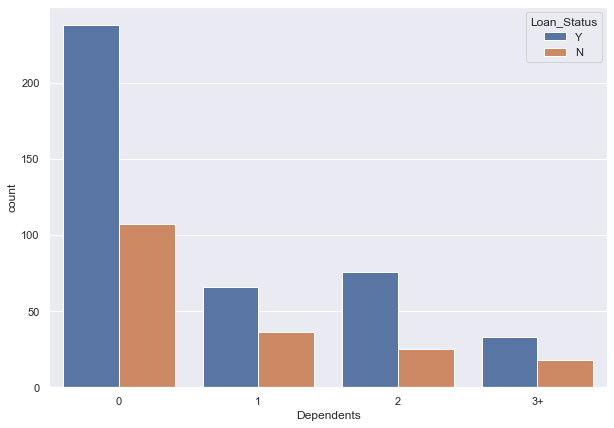

In [19]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Dependents', hue='Loan_Status',data= df )

applicants who is not having any dependants is high in count and also from the above bar plot, we can see that Applicants who is having 0 dependants having high chance of getting his/her loan approved.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

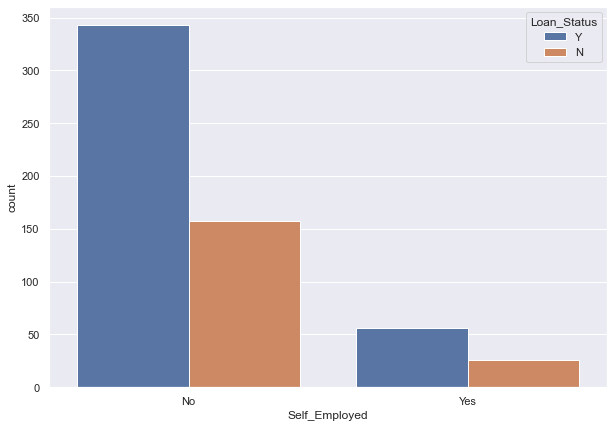

In [20]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Self_Employed', hue='Loan_Status',data= df )

 the applicants are not self employed and upon checking with target variable it is clear that loan is getting approve for most of the employed people who is not belong to self-employed category.

<AxesSubplot:xlabel='Education', ylabel='count'>

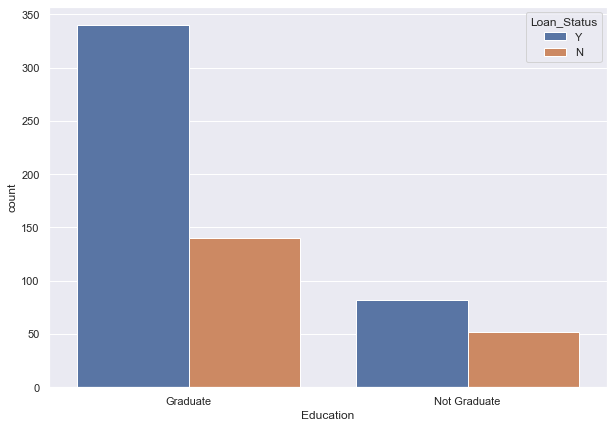

In [21]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Education', hue='Loan_Status',data= df )

Applicants are mostly Graduate in the given dataset and in terms of education,loan is getting approved for graduates than not graduate applicants.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

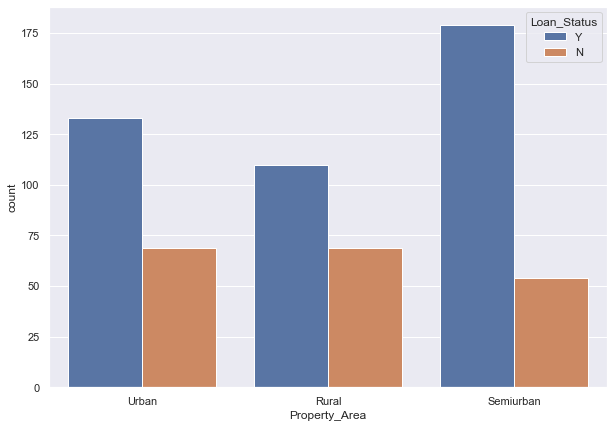

In [22]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Property_Area', hue='Loan_Status',data= df )


Applicants applying for loan is having property area to get the loan and our dataset is showing that Semi-Urban property area ranks high and loan is getting approval for the applicants who is having property in Semi - Urban and then Urban places.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

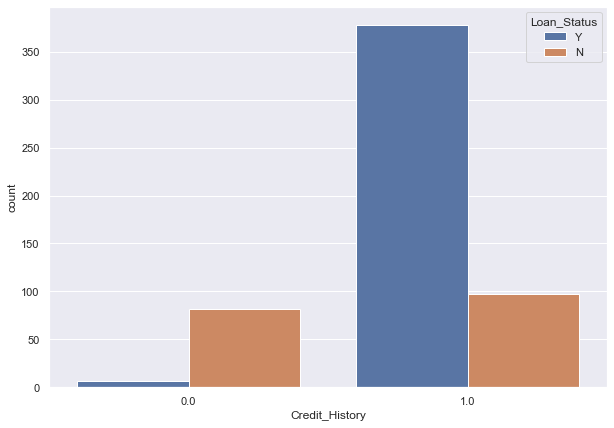

In [23]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Credit_History', hue='Loan_Status',data= df )

we can see that most of the applicants have credit history and in terms of loan status, the applicants who are having credit history has high chances of getting loan approved.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

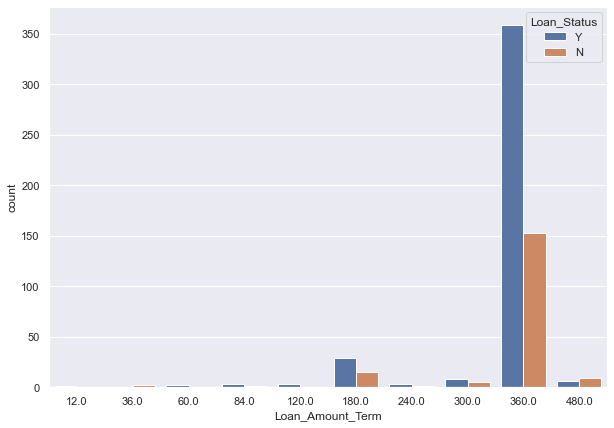

In [24]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status',data= df )

So we can see that our dataset is having the loan amount term has 360 in months,and in terms of loan status,applicants who have avail loan for 360 in months are having more chances for getting the loan approved.

In [25]:
num_col = df.select_dtypes(exclude = np.object)
cat_col = df.select_dtypes(include = np.object)

In [26]:
num_col.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64


treat missing values numerical data with mean and catergorical do with mode

In [27]:
num_col['LoanAmount'] = num_col['LoanAmount'].fillna(num_col['LoanAmount'].mean())
num_col['Loan_Amount_Term'] = num_col['Loan_Amount_Term'].fillna(num_col['Loan_Amount_Term'].mean())
num_col['Credit_History'] = num_col['Credit_History'].fillna(num_col['Credit_History'].mode()[0])
num_col['CoapplicantIncome'] = num_col['CoapplicantIncome'].replace(0,num_col['CoapplicantIncome'].mean())

In [28]:
num_col.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

so the null values are cleared

In [29]:
cat_col.isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

we treat the missing values with categorical data by mode because of categorical missing values we cant fill by mean

In [30]:
cat_col['Gender'] = cat_col['Gender'].fillna(cat_col['Gender'].mode()[0])
cat_col['Married'] = cat_col['Married'].fillna(cat_col['Married'].mode()[0])
cat_col['Dependents'] = cat_col['Dependents'].fillna(cat_col['Dependents'].mode()[0])
cat_col['Self_Employed'] = cat_col['Self_Employed'].fillna(cat_col['Self_Employed'].mode()[0])

In [31]:
cat_col.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [32]:
cat_col.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


convert categorical data into numerical data using labelencoder

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cat_col = cat_col.apply(labelencoder.fit_transform)

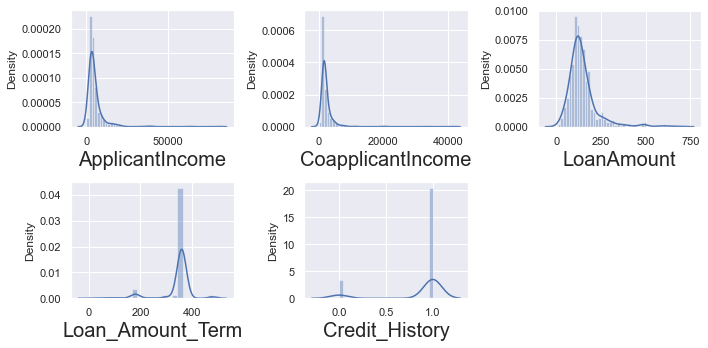

In [34]:
plt.figure(figsize = (10,5))
plotnumber = 1

for column in num_col:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(num_col[column])
        plt.xlabel(column,fontsize = 20)
               
    plotnumber+=1
plt.tight_layout()

There is skewness in the data

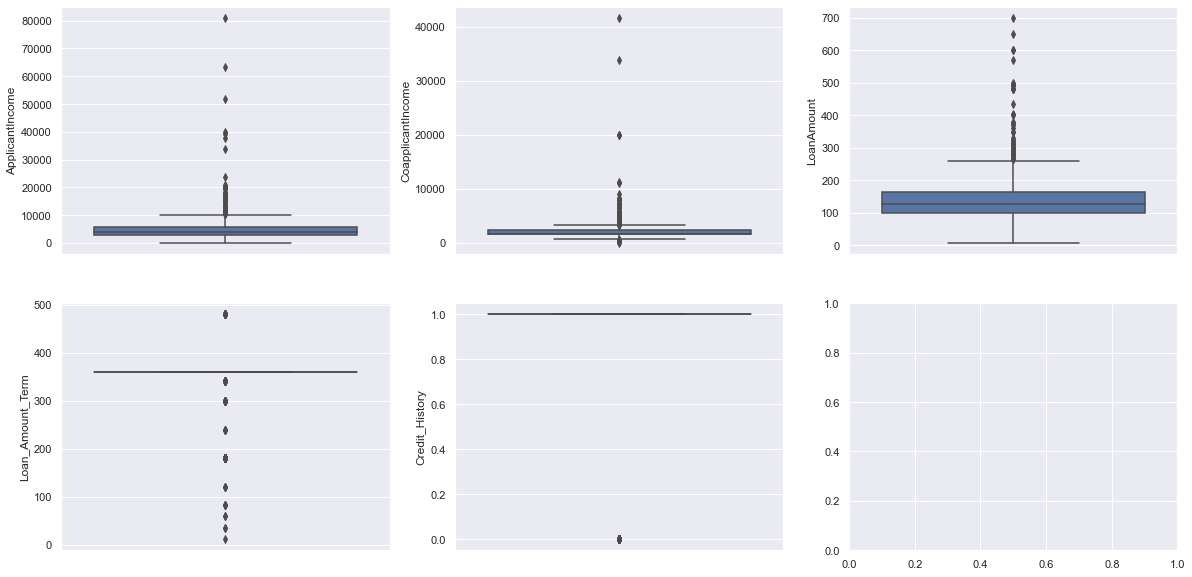

In [35]:
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(20,10))
index=0
ax = ax.flatten()

for col, value in num_col.items():
    if col !='type':
        sns.boxplot(y=col,data=num_col,ax=ax[index])
        index+= 1

Outliers are also present in the data 

In [36]:
from scipy.stats import zscore
z=zscore(num_col)
z


array([[ 0.07299082, -0.2752068 ,  0.        ,  0.27985054,  0.41173269],
       [-0.13441195, -0.31844206, -0.21927331,  0.27985054,  0.41173269],
       [-0.39374734, -0.2752068 , -0.957641  ,  0.27985054,  0.41173269],
       ...,
       [ 0.43717437, -0.80254228,  1.26937121,  0.27985054,  0.41173269],
       [ 0.35706382, -0.2752068 ,  0.4833669 ,  0.27985054,  0.41173269],
       [-0.13441195, -0.2752068 , -0.15972753,  0.27985054, -2.42876026]])

In [37]:
threshold = 3
print (np.where(z>3))

(array([  9, 126, 130, 155, 155, 171, 171, 177, 177, 183, 185, 278, 308,
       333, 333, 369, 402, 409, 417, 432, 443, 487, 506, 523, 525, 561,
       581, 600, 604], dtype=int64), array([1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2,
       2, 2, 2, 2, 1, 1, 2], dtype=int64))


In [38]:
df_new = num_col [(z<3).all(axis = 1)]

checking for skewness

In [39]:
df_new.skew()

ApplicantIncome      2.164762
CoapplicantIncome    2.554282
LoanAmount           1.076221
Loan_Amount_Term    -2.433130
Credit_History      -2.010069
dtype: float64

In [40]:
from sklearn.preprocessing import power_transform 
df_New=power_transform(df_new)
df_New=pd.DataFrame(df_New,columns=num_col.columns)

In [42]:
df_New.skew()

ApplicantIncome      0.028063
CoapplicantIncome    0.202442
LoanAmount           0.060143
Loan_Amount_Term     0.396698
Credit_History      -2.010069
dtype: float64


skewness are cleared but according problem features if clean the skewness get too much of data is lost.

In [43]:
df1 = pd.concat([num_col,cat_col],axis = 1)
df1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849,1621.245798,146.412162,360.0,1.0,0,1,0,0,0,0,2,1
1,4583,1508.000000,128.000000,360.0,1.0,1,1,1,1,0,0,0,0
2,3000,1621.245798,66.000000,360.0,1.0,2,1,1,0,0,1,2,1
3,2583,2358.000000,120.000000,360.0,1.0,3,1,1,0,1,0,2,1
4,6000,1621.245798,141.000000,360.0,1.0,4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,1621.245798,71.000000,360.0,1.0,609,0,0,0,0,0,0,1
610,4106,1621.245798,40.000000,180.0,1.0,610,1,1,3,0,0,0,1
611,8072,240.000000,253.000000,360.0,1.0,611,1,1,1,0,0,2,1
612,7583,1621.245798,187.000000,360.0,1.0,612,1,1,2,0,0,2,1


In [44]:
df1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849,1621.245798,146.412162,360.0,1.0,0,1,0,0,0,0,2,1
1,4583,1508.000000,128.000000,360.0,1.0,1,1,1,1,0,0,0,0
2,3000,1621.245798,66.000000,360.0,1.0,2,1,1,0,0,1,2,1
3,2583,2358.000000,120.000000,360.0,1.0,3,1,1,0,1,0,2,1
4,6000,1621.245798,141.000000,360.0,1.0,4,1,0,0,0,0,2,1


In [45]:
df1.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
ApplicantIncome,1.000000,-0.050734,0.565620,-0.045242,-0.018615,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,-0.009500,-0.004710
CoapplicantIncome,-0.050734,1.000000,0.205388,-0.073197,0.008339,0.048022,0.024156,-0.017504,0.031776,-0.088032,0.013265,0.028111,-0.089189
LoanAmount,0.565620,0.205388,1.000000,0.038801,-0.001431,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,-0.044776,-0.036416
Loan_Amount_Term,-0.045242,-0.073197,0.038801,1.000000,0.000432,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.077620,-0.020974
Credit_History,-0.018615,0.008339,-0.001431,0.000432,1.000000,-0.030603,0.009170,0.010938,-0.040160,-0.073658,-0.001550,0.001963,0.540556
Loan_ID,0.016925,0.048022,0.035684,-0.028945,-0.030603,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,-0.155416,0.011773
Gender,0.058809,0.024156,0.107930,-0.073567,0.009170,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,-0.025752,0.017987
Married,0.051708,-0.017504,0.147141,-0.100863,0.010938,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.004257,0.091478
Dependents,0.118202,0.031776,0.163106,-0.101054,-0.040160,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,-0.000244,0.010118
Education,-0.140760,-0.088032,-0.166998,-0.077242,-0.073658,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.065243,-0.085884


<function matplotlib.pyplot.show(close=None, block=None)>

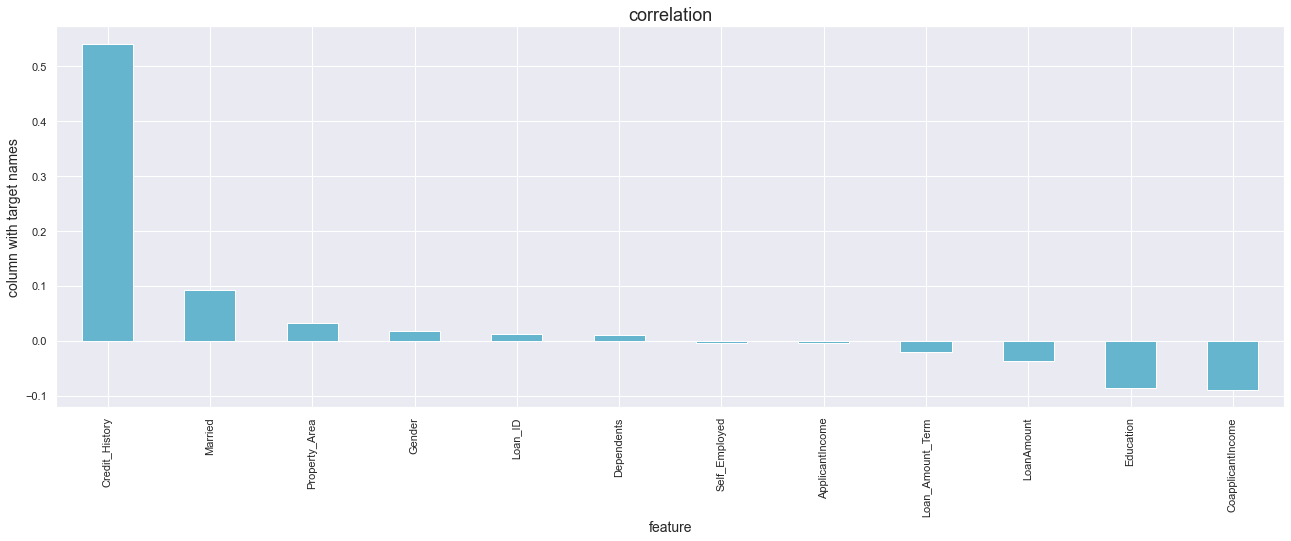

In [46]:
plt.figure(figsize=(22,7))
df1.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show

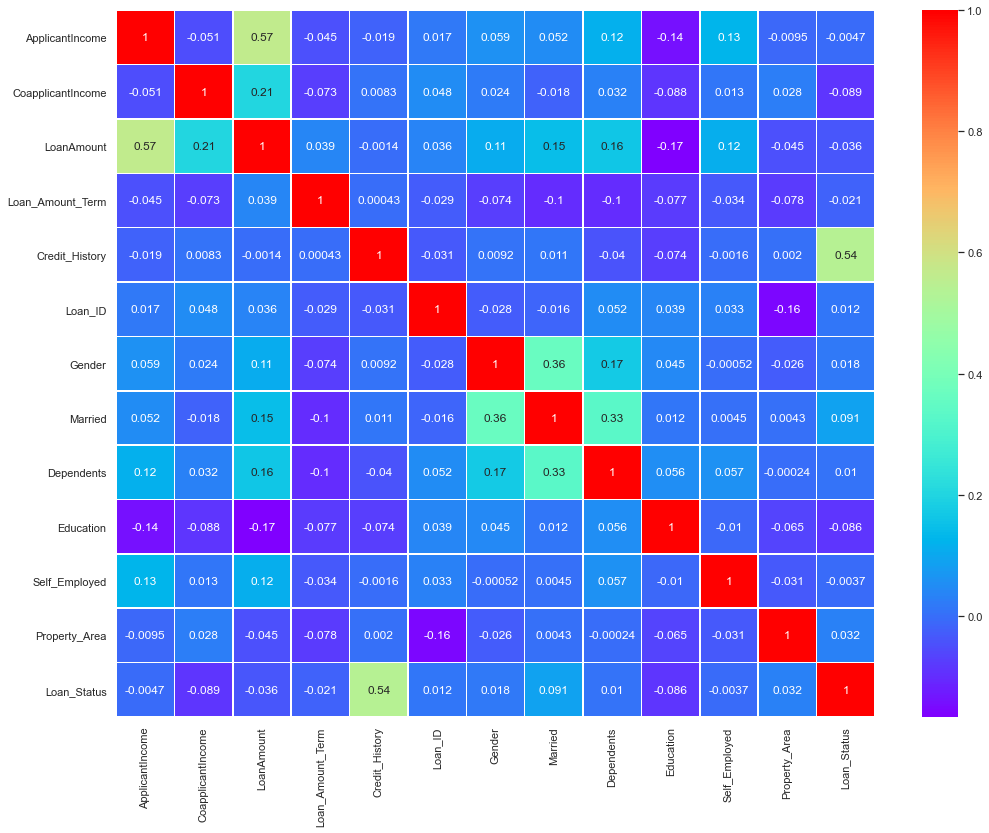

In [47]:
#heat map
fig, ax = plt.subplots(figsize=(17,13))
sns.heatmap(df1.corr(),cmap = 'rainbow', annot=True, linewidths=.5, ax=ax)
plt.show()


dropping loan_id column we dont need that because of it shows same as inex id

In [48]:
df1 = df1.drop(columns = ['Loan_ID'],axis = 1)
#splitting target and variables
X = df1.drop(columns = ['Loan_Status'],axis = 1)
y = df1['Loan_Status']

In [49]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5849,1621.245798,146.412162,360.0,1.0,1,0,0,0,0,2
1,4583,1508.000000,128.000000,360.0,1.0,1,1,1,0,0,0
2,3000,1621.245798,66.000000,360.0,1.0,1,1,0,0,1,2
3,2583,2358.000000,120.000000,360.0,1.0,1,1,0,1,0,2
4,6000,1621.245798,141.000000,360.0,1.0,1,0,0,0,0,2


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [51]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0.072991,-0.275207,0.000000,0.279851,0.411733,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,1.223298
1,-0.134412,-0.318442,-0.219273,0.279851,0.411733,0.472343,0.728816,0.253470,-0.528362,-0.392601,-1.318513
2,-0.393747,-0.275207,-0.957641,0.279851,0.411733,0.472343,0.728816,-0.737806,-0.528362,2.547117,1.223298
3,-0.462062,0.006073,-0.314547,0.279851,0.411733,0.472343,0.728816,-0.737806,1.892641,-0.392601,1.223298
4,0.097728,-0.275207,-0.064454,0.279851,0.411733,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,1.223298


In [52]:

y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [53]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

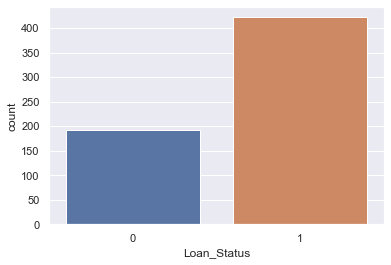

In [54]:
sns.countplot(df1['Loan_Status'])

In [55]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x , y = SM.fit_resample(x,y)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

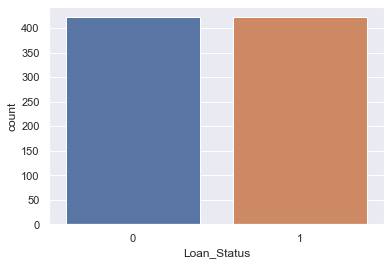

In [56]:
sns.countplot(y)

In [57]:
y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

# Model Building

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,classification_report
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve

In [59]:
#split train test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=50)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       316
           1       0.82      0.83      0.82       317

    accuracy                           0.82       633
   macro avg       0.82      0.82      0.82       633
weighted avg       0.82      0.82      0.82       633

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       106
           1       0.71      0.71      0.71       105

    accuracy                           0.71       211
   macro avg       0.71      0.71      0.71       211
weighted avg       0.71      0.71      0.71       211

AxesSubplot(0.125,0.125;0.62x0.755)


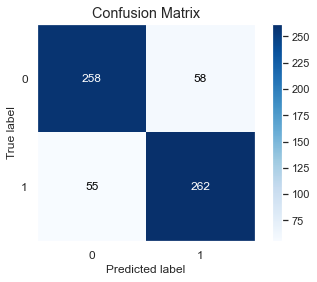

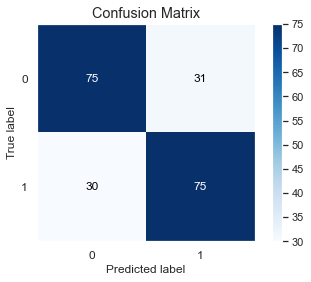

In [60]:
#Train result
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred =KNN .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(skplt.metrics.plot_confusion_matrix(y_train, y_pred))


#Test result
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred =KNN .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(skplt.metrics.plot_confusion_matrix(y_test, y_pred))

In [61]:
print("Training accuracy::",KNN.score(x_train,y_train))
print("Test accuracy::",KNN.score(x_test,y_test))

Training accuracy:: 0.8214849921011058
Test accuracy:: 0.7109004739336493


In [62]:
print(cross_val_score(KNN,x,y,cv=5).mean())

0.7310650887573964


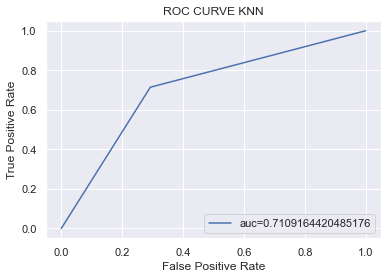

The Score for the ROC AUC Curve is : 71.09%


In [63]:
#roc_curve plot to check the socre of knn
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC AUC Curve is : {}%'.format(round(auc_score,4)*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       316
           1       1.00      1.00      1.00       317

    accuracy                           1.00       633
   macro avg       1.00      1.00      1.00       633
weighted avg       1.00      1.00      1.00       633

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       106
           1       0.78      0.90      0.84       105

    accuracy                           0.82       211
   macro avg       0.83      0.82      0.82       211
weighted avg       0.83      0.82      0.82       211

AxesSubplot(0.125,0.125;0.62x0.755)


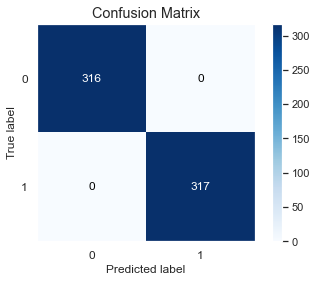

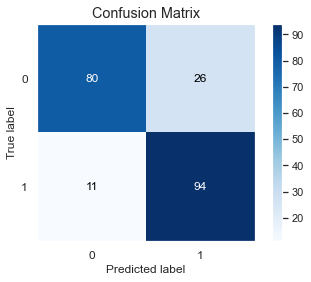

In [64]:
#train result
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred =RFC .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(skplt.metrics.plot_confusion_matrix(y_train, y_pred))


#test result
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred =RFC .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(skplt.metrics.plot_confusion_matrix(y_test, y_pred))

In [65]:
print("Training accuracy::",RFC.score(x_train,y_train))
print("Test accuracy::",RFC.score(x_test,y_test))

Training accuracy:: 1.0
Test accuracy:: 0.8246445497630331


In [66]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8388982812059735


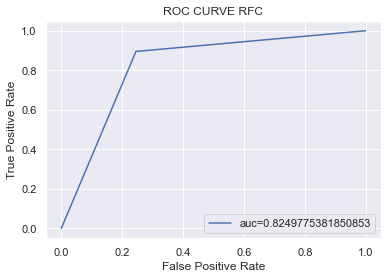

The Score for the ROC Curve is : 82.5%


In [67]:
#roc_curve plot to check the socre of RFC
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       316
           1       1.00      1.00      1.00       317

    accuracy                           1.00       633
   macro avg       1.00      1.00      1.00       633
weighted avg       1.00      1.00      1.00       633

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       106
           1       0.75      0.80      0.77       105

    accuracy                           0.77       211
   macro avg       0.77      0.77      0.77       211
weighted avg       0.77      0.77      0.77       211

AxesSubplot(0.125,0.125;0.62x0.755)


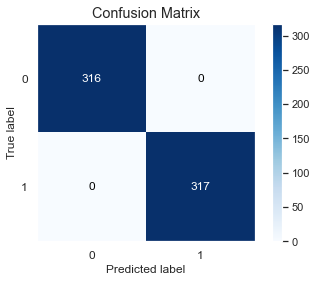

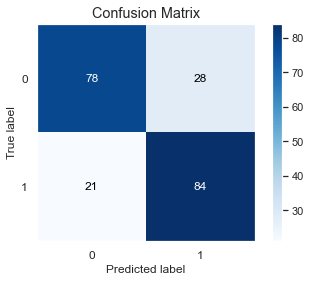

In [68]:
#train result
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
y_pred =DecisionTree .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(skplt.metrics.plot_confusion_matrix(y_train, y_pred))

#test result
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
y_pred =DecisionTree .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(skplt.metrics.plot_confusion_matrix(y_test, y_pred))

In [69]:
print("Training accuracy::",DecisionTree.score(x_train,y_train))
print("Test accuracy::",DecisionTree.score(x_test,y_test))

Training accuracy:: 1.0
Test accuracy:: 0.7677725118483413


In [70]:
print(cross_val_score(DecisionTree,x,y,cv=5).mean())

0.7879402648633418


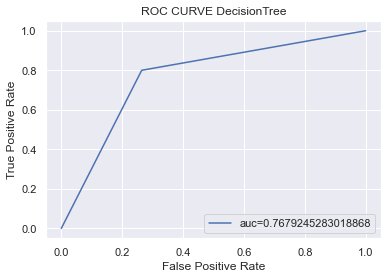

The Score for the ROC Curve is : 76.79%


In [71]:
#roc_curve plot to check the socre of Decisiontree
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE DecisionTree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

# ENSEMBLE TECHNIQUES

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       316
           1       0.79      0.87      0.83       317

    accuracy                           0.82       633
   macro avg       0.82      0.82      0.82       633
weighted avg       0.82      0.82      0.82       633

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.80      0.66      0.73       106
           1       0.71      0.84      0.77       105

    accuracy                           0.75       211
   macro avg       0.76      0.75      0.75       211
weighted avg       0.76      0.75      0.75       211

AxesSubplot(0.125,0.125;0.62x0.755)


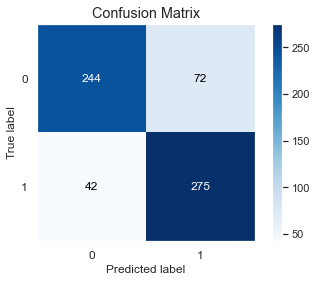

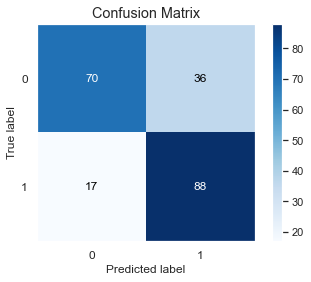

In [72]:
#train result
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_pred =adb .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(skplt.metrics.plot_confusion_matrix(y_train, y_pred))


#test result
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_pred =adb .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(skplt.metrics.plot_confusion_matrix(y_test, y_pred))

In [73]:
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

Training accuracy:: 0.8199052132701422
Test accuracy:: 0.7488151658767772


In [74]:
print(cross_val_score(adb,x,y,cv=5).mean())

0.7334389969005353


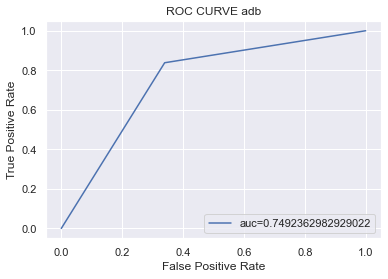

The Score for the ROC Curve is : 74.92%


In [75]:
#roc_curve plot to check the socre of AdaBoostClassifier
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE adb')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       316
           1       0.87      1.00      0.93       317

    accuracy                           0.92       633
   macro avg       0.93      0.92      0.92       633
weighted avg       0.93      0.92      0.92       633

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.90      0.66      0.76       106
           1       0.73      0.92      0.82       105

    accuracy                           0.79       211
   macro avg       0.81      0.79      0.79       211
weighted avg       0.81      0.79      0.79       211

AxesSubplot(0.125,0.125;0.62x0.755)


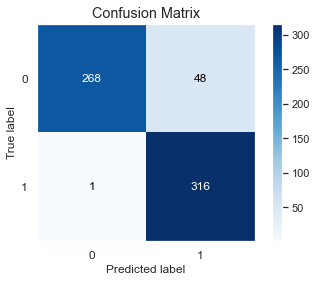

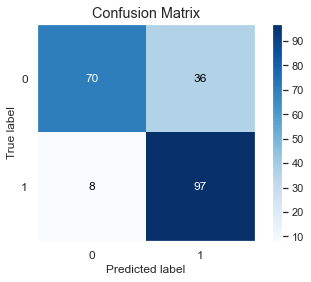

In [76]:
#train result
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred =gbc .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print( skplt.metrics.plot_confusion_matrix(y_train, y_pred))


#test result
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred =gbc .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print( skplt.metrics.plot_confusion_matrix(y_test, y_pred))

In [77]:
print("Training accuracy::",gbc.score(x_train,y_train))
print("Test accuracy::",gbc.score(x_test,y_test))

Training accuracy:: 0.9225908372827805
Test accuracy:: 0.7914691943127962


In [78]:
print(cross_val_score(gbc,x,y,cv=5).mean())

0.7844181459566075


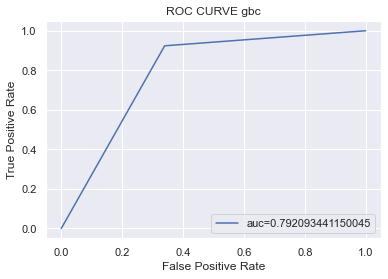

The Score for the ROC Curve is : 79.21000000000001%


In [79]:
#roc_curve plot to check the socre of GradientBoostClassifier
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE gbc')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

the random forest model is having less difference is considered as best model and applying Hyper parameter tuning to increase the accuracy of that model.

# HyperParametr Tuning

In [80]:
params = {'bootstrap': [True],
           'max_depth': [80, 90, 100, 110],
           'max_features': ['auto', 'sqrt', 'log2'],
           'min_samples_leaf': [3, 4, 5],
           'min_samples_split': [8, 10, 12],
           'n_estimators': [100,120,200,300]
}

In [81]:
model=RandomForestClassifier()

In [82]:
grid_clf=GridSearchCV(model,params,verbose=4,refit=True,n_jobs = -1)

In [83]:
grid_clf.fit(x_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 120, 200, 300]},
             verbose=4)

In [84]:
final_model=grid_clf.best_estimator_
print(final_model)

RandomForestClassifier(max_depth=100, min_samples_leaf=3, min_samples_split=8)


In [85]:
final_model=grid_clf.best_params_
print(final_model)

{'bootstrap': True, 'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


In [86]:
final_model=grid_clf.best_score_
print(final_model)

0.7882514685664291


In [87]:
final_model = RandomForestClassifier(n_estimators=20 , max_features = 'sqrt', max_depth = 80,
                                     bootstrap = True,min_samples_split = 8,min_samples_leaf = 3)                              
final_model.fit(x_train,y_train)
final_model.score(x_test,y_test)

0.7582938388625592

In [88]:
y_pred=final_model.predict(x_test)

In [89]:
accuracy_score(y_test,y_pred)

0.7582938388625592

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

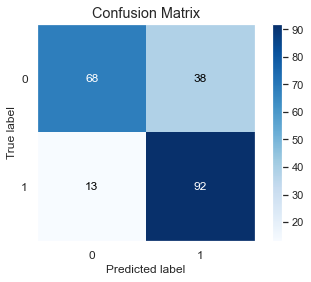

In [90]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)

In [91]:
print(cross_val_score(final_model,x,y,cv=5).mean())

0.8081360946745562


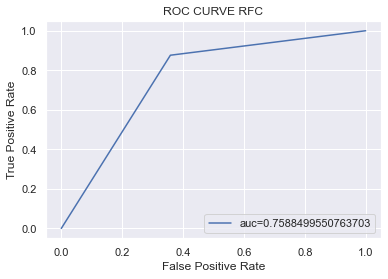

The Score for the ROC Curve is : 75.88000000000001%


In [92]:
#roc_curve plot to check the socre of RFC
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

After hyper parameter our final model is 76% accuracy

In [97]:
pred=RFC.predict(x_test)
pred=pd.DataFrame({'Pred':pred,'Real Value':y_test})
pred

,Pred,Real Value
651,0,0
232,1,1
643,0,0
16,1,1
650,0,0
...,...,...
483,1,1
284,1,0
108,0,0
538,1,0


In [98]:
import joblib
joblib.dump(final_model,"Loan_Prediction")

['Loan_Prediction']